# BMI 500 Week 11 Homework
## Question 2: Agent-Based Modeling of Pandemic Spread

### A) Building the Base Model: Infection Dynamics in a Population

#### i. Define the Environment and Initial Conditions

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [3]:
# create and populate bounded area
def create_df(num_s, num_i, num_r, x_max, y_max):
    agent_status = (['S'] * num_s) + (['I'] * num_i) + (['R'] * num_r)
    x_pos = list(np.random.randint(0, x_max, size=len(agent_status)))
    y_pos = list(np.random.randint(0, y_max, size=len(agent_status)))
    return pd.DataFrame({'agent_status': agent_status, 'x_pos': x_pos, 'y_pos': y_pos})

#### ii. Define Agent Behaviors

In [4]:
def behavior(df, p, q):
    move(df)
    infected_df = df.loc[df.agent_status == 'I']
    transmit(df, p, infected_df)
    recover(df, q, infected_df)

def move(df):
    width, _ = df.shape
    for index, row in df.iterrows():
        i = random.randint(1,5)
        if i==1:
            df.at[index, 'x_pos'] = min(row.x_pos+1, width-1)
        elif i==2:
            df.at[index, 'x_pos'] = max(row.x_pos-1, 0)
        elif i==3:
            df.at[index, 'y_pos'] = min(row.y_pos+1, width-1)
        elif i==4:
            df.at[index, 'y_pos'] = max(row.y_pos-1, 0)

def transmit(df, p, infected_df):
    for index, row in infected_df.iterrows():
        shared = df.loc[(df.x_pos==row.x_pos) & (df.y_pos==row.y_pos) & (df.agent_status == 'S')]
        for index, row in shared.iterrows():
            transmit = random.choices([0,1], weights=[1-p, p])[0]
            if transmit:
                df.at[index, 'agent_status'] = 'I'

def recover(df, q, infected_df):
    for index, row in infected_df.iterrows():
        recover = random.choices([0,1], weights=[1-q, q])[0]
        if recover:
            df.at[index, 'agent_status'] = 'R'

#### iii. Run the Simulation

In [5]:
def simulate(steps, df, p, q):
    s = [len(df[df.agent_status=='S'])]
    i = [len(df[df.agent_status=='I'])]
    r = [len(df[df.agent_status=='R'])]
    for step in range(steps):
        behavior(df, p, q)
        s.append(len(df[df.agent_status=='S']))
        i.append(len(df[df.agent_status=='I']))
        r.append(len(df[df.agent_status=='R']))
    return pd.DataFrame({'susceptible': s, 'infected': i, 'recovered': r})

In [6]:
def plot_sim(df, title):
    plt.plot(list(range(len(df))), df.susceptible, label='susceptible')
    plt.plot(list(range(len(df))), df.infected, label='infected')
    plt.plot(list(range(len(df))), df.recovered, label='recovered')
    plt.legend()
    plt.xlabel('Steps')
    plt.ylabel('Number of Agents')
    plt.title(title)
    plt.show()

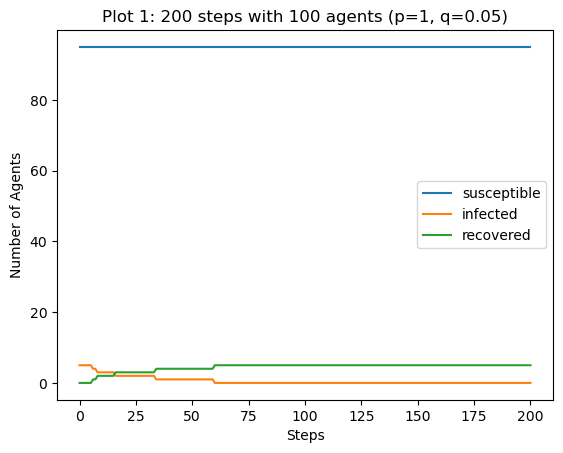

In [11]:
df = create_df(95, 5, 0, 75, 75)
simulated_200 = simulate(200, df, 1, 0.05)
plot_sim(simulated_200, 'Plot 1: 200 steps with 100 agents (p=1, q=0.05)')

Peak infected at step 20
susceptible    776
infected       126
recovered       98
Name: 20, dtype: int64
Peak recovered at step 240
susceptible    405
infected         0
recovered      595
Name: 240, dtype: int64


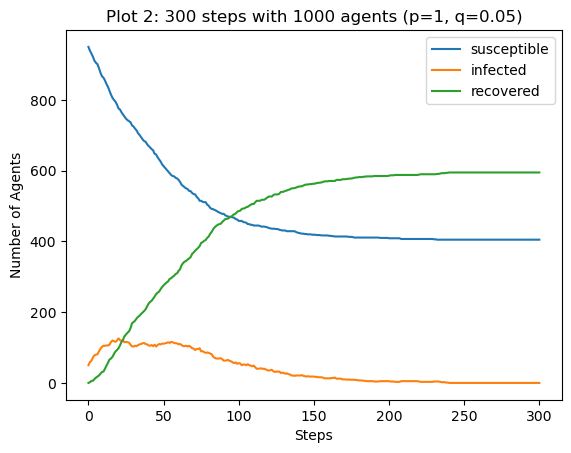

In [29]:
df = create_df(950, 50, 0, 75, 75)
simulated = simulate(300, df, 1, 0.05)
print('Peak infected at step', simulated.infected.idxmax())
print(simulated.loc[simulated.infected.idxmax()])
print('Peak recovered at step', simulated.recovered.idxmax())
print(simulated.loc[simulated.recovered.idxmax()])
plot_sim(simulated, 'Plot 2: 300 steps with 1000 agents (p=1, q=0.05)')

#### iv. Sensitivity Analysis

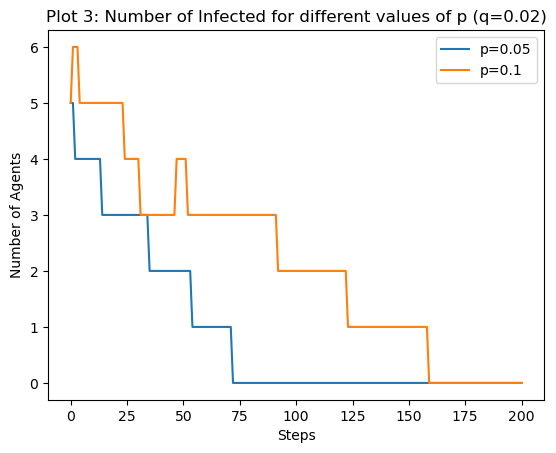

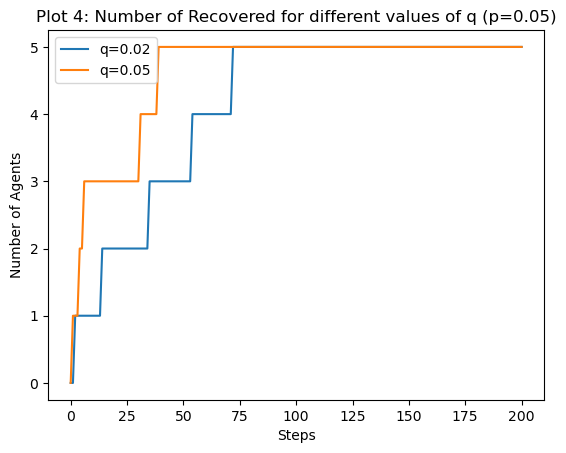

In [187]:
# different p and q
df = create_df(95, 5, 0, 75, 75)
simulation1 = simulate(200, df.copy(), 0.05, 0.02) # p=0.05, q=0.02
simulation2 = simulate(200, df.copy(), 0.1, 0.02) # p=0.1, q=0.02
simulation3 = simulate(200, df.copy(), 0.05, 0.02) # p=0.05, q=0.05

plt.plot(list(range(len(simulation1))), simulation1.infected, label='p=0.05')
plt.plot(list(range(len(simulation2))), simulation2.infected, label='p=0.1')
plt.xlabel('Steps')
plt.ylabel('Number of Agents')
plt.title('Plot 3: Number of Infected for different values of p (q=0.02)')
plt.legend()
plt.show()

plt.plot(list(range(len(simulation1))), simulation1.recovered, label='q=0.02')
plt.plot(list(range(len(simulation3))), simulation3.recovered, label='q=0.05')
plt.xlabel('Steps')
plt.ylabel('Number of Agents')
plt.title('Plot 4: Number of Recovered for different values of q (p=0.05)')
plt.legend()
plt.show()

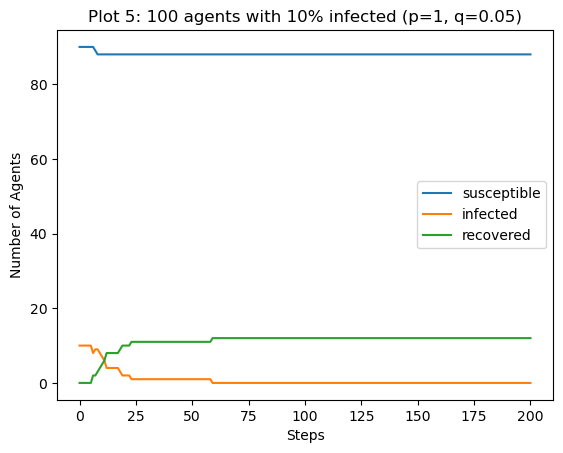

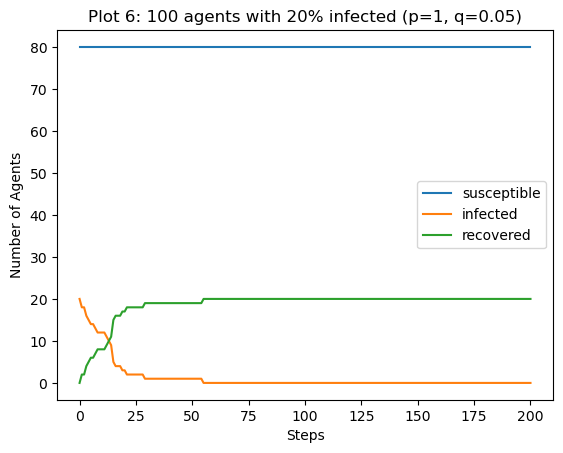

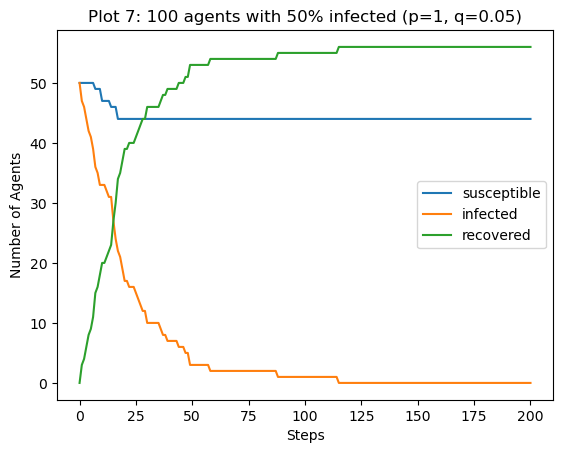

In [15]:
# different starting proportion of infected agents
df = create_df(90, 10, 0, 75, 75)
simulation1 = simulate(200, df, 1, 0.05)
plot_sim(simulation1, 'Plot 5: 100 agents with 10% infected (p=1, q=0.05)')

df = create_df(80, 20, 0, 75, 75)
simulation2 = simulate(200, df, 1, 0.05)
plot_sim(simulation2, 'Plot 6: 100 agents with 20% infected (p=1, q=0.05)')

df = create_df(50, 50, 0, 75, 75)
simulation3 = simulate(200, df, 1, 0.05)
plot_sim(simulation3, 'Plot 7: 100 agents with 50% infected (p=1, q=0.05)')

### B) Extending the Model: Social Distancing and Intervention Strategies

#### i. Introduce Social Distancing Measures

In [17]:
def social_distancing_behavior(df, p, q, m):
    social_distancing_move(df, m)
    infected_df = df.loc[df.agent_status == 'I']
    transmit(df, p, infected_df)
    recover(df, q, infected_df)
    
def social_distancing_move(df, m):
    width, _ = df.shape
    for index, row in df.iterrows():
        # reduced probability of moving (m is probability that agent will not move)
        if random.choices([0,1], weights=[1-m, m])[0] == 0:
            i = random.randint(1,5)
            infected_df = df.loc[df.agent_status == 'I']
            x = row.x_pos
            y = row.y_pos
            # avoidant movement
            if x!=0 and len(infected_df.loc[(infected_df.x_pos==x+1) & (infected_df.y_pos==y)])!=0:
                df.at[index, 'x_pos'] = max(x-1, 0)
            elif x!=width-1 and len(infected_df.loc[(infected_df.x_pos==x-1) & (infected_df.y_pos==y)])!=0:
                df.at[index, 'x_pos'] = min(x+1, width-1)
            elif y!=0 and len(infected_df.loc[(infected_df.x_pos==x) & (infected_df.y_pos==y+1)])!=0:
                df.at[index, 'y_pos'] = max(y-1, 0)
            elif y!=width-1 and len(infected_df.loc[(infected_df.x_pos==x) & (infected_df.y_pos==y-1)])!=0:
                df.at[index, 'y_pos'] = min(y+1, width-1)
            # regular movement
            elif i==1:
                df.at[index, 'x_pos'] = min(x+1, width-1)
            elif i==2:
                df.at[index, 'x_pos'] = max(x-1, 0)
            elif i==3:
                df.at[index, 'y_pos'] = min(y+1, width-1)
            elif i==4:
                df.at[index, 'y_pos'] = max(y-1, 0)

def simulate_social_distancing(steps, df, p, q, m):
    s = [len(df[df.agent_status=='S'])]
    i = [len(df[df.agent_status=='I'])]
    r = [len(df[df.agent_status=='R'])]
    for step in range(steps):
        social_distancing_behavior(df, p, q, m)
        s.append(len(df[df.agent_status=='S']))
        i.append(len(df[df.agent_status=='I']))
        r.append(len(df[df.agent_status=='R']))
    return pd.DataFrame({'susceptible': s, 'infected': i, 'recovered': r})

Peak infected at step 4
susceptible    932
infected        56
recovered       12
Name: 4, dtype: int64
Peak recovered at step 135
susceptible    850
infected         0
recovered      150
Name: 135, dtype: int64


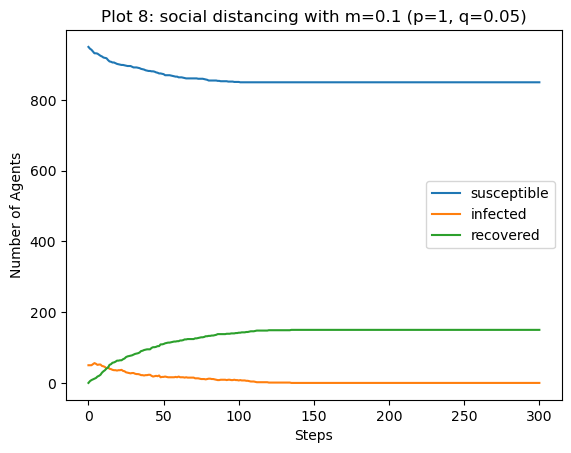

In [30]:
# df = create_df(95, 5, 0, 75, 75)
df = create_df(950, 50, 0, 75, 75)
simulated = simulate_social_distancing(300, df, 1, 0.05, 0.1)
print('Peak infected at step', simulated.infected.idxmax())
print(simulated.loc[simulated.infected.idxmax()])
print('Peak recovered at step', simulated.recovered.idxmax())
print(simulated.loc[simulated.recovered.idxmax()])
plot_sim(simulated, 'Plot 8: social distancing with m=0.1 (p=1, q=0.05)')

#### iii. Additional Sensitivity Analysis

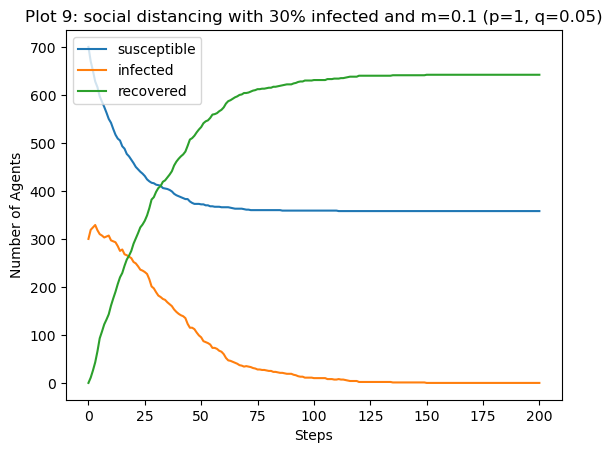

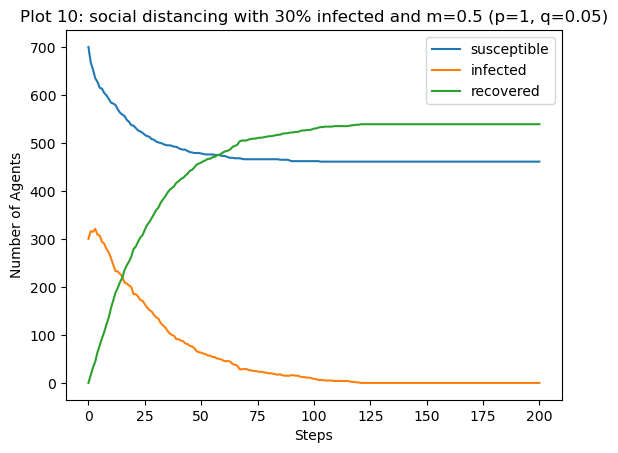

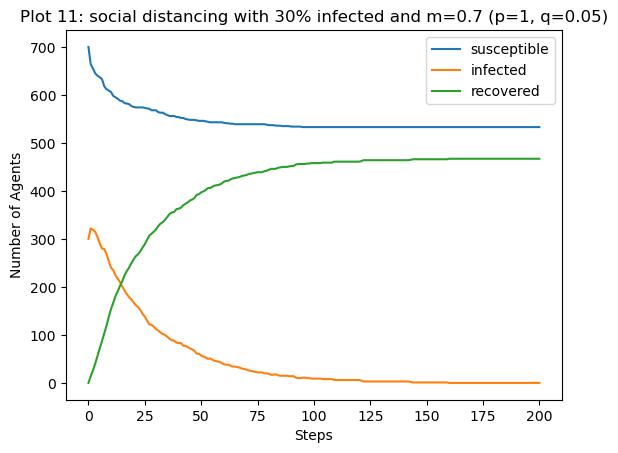

In [21]:
df = create_df(700, 300, 0, 75, 75)
simulated_200 = simulate_social_distancing(200, df.copy(), 1, 0.05, 0.1)
plot_sim(simulated_200, 'Plot 9: social distancing with 30% infected and m=0.1 (p=1, q=0.05)')

simulated_200 = simulate_social_distancing(200, df.copy(), 1, 0.05, 0.5)
plot_sim(simulated_200, 'Plot 10: social distancing with 30% infected and m=0.5 (p=1, q=0.05)')

simulated_200 = simulate_social_distancing(200, df.copy(), 1, 0.05, 0.7)
plot_sim(simulated_200, 'Plot 11: social distancing with 30% infected and m=0.7 (p=1, q=0.05)')